1.0


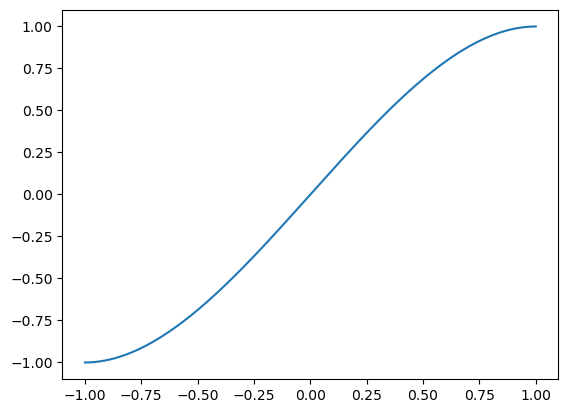

In [18]:

import matplotlib.pyplot  as plt
import math
import numpy as np

# aSOR
def f(x):
    # return x*(2 - x)
    return -0.5 * x**3 + 1.5 * x

print(f(1))

left = -1
right = 1
xx = [i/10000 * (right - left) + left for i in range(10000)]
# print(xx)
yy = [f(xxx) for xxx in xx]
# yy = [f(f(f(f(f(xxx))))) for xxx in xx]

plt.plot(xx, yy)
plt.show()

In [6]:
def sign(x, iters):
    for i in range(iters):
        x = f(x)
    return x

def sign_fast(x, K):
    for i in range(len(K)):
        x = f(K[i] * x)
    return x

print(sign(-0.25, 6))

K = [1.51, 1.28, 1.06, 1.01]
print(sign_fast(-0.5, K))

-0.999554759037920
-0.999853163954879


In [2]:
def relaxFactor(f, alpha, sigma_i, upper):
    """
    Calculate the relaxation factors for the adaptive successive over-relaxation (aSOR) method.

    Parameters:
    f (function): The function used in the iterative process.
    alpha (float): The precision parameter, determines the convergence criteria.
    sigma_i (float): The initial input range lower bound, typically a small positive number.

    Returns:
    list: A list of relaxation factors k_i.
    """
    epsilon_i = sigma_i
    K = []  # List to store the relaxation factors

    while 1 - epsilon_i > 2 ** (-alpha):
        # Define a helper function to compute the objective for argmax
        def objective(k):
            return min(f(k * epsilon_i), f(k))

        # Find the optimal k_i that maximizes the objective function
        # Note: This is a simplified approach; in practice, you might need a numerical optimization method
        # Here, we use a simple grid search for demonstration purposes
        from scipy.optimize import minimize_scalar
        # We minimize the negative of the objective function to find the maximum
        res = minimize_scalar(lambda k: -objective(k), bounds=(1, upper), method='bounded')
        k_i = res.x

        # Append the computed k_i to the list K
        K.append(k_i)

        # Update epsilon_i for the next iteration
        epsilon_i = f(k_i)

    return K



# Example usage:
if __name__ == "__main__":
    # Define the function f(z) = -1/2 * z^3 + 3/2 * z
    def f_sign(z):
        return -0.5 * z**3 + 1.5 * z

    alpha = 10  # Precision parameter
    sigma_i = 0  # Initial input range lower bound

    K_sign = relaxFactor(f_sign, alpha, sigma_i, 2)
    print("Relaxation factors:", K_sign)


    def sign(x, iters):
        for i in range(iters):
            x = f_sign(x)
        return x

    def sign_fast(x, K):
        for i in range(len(K)):
            x = f_sign(K[i] * x)
        return x

    input = 0.6

    print(sign(input, 6))

    # K_sign = [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
    print(sign_fast(input, K_sign))

Relaxation factors: [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
0.9999999999999999
0.9999928589826494


In [8]:
def f_inv(z):
    return z * (2 - z)
def inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki * b * (2 - ki*a)
        a = ki * a * (2 - ki*a)
    return b

K_inv = relaxFactor(f_inv, 10, sigma_i, 3)
print(K_inv)

xx = 0.8

# 1 / x
print(inverse(xx, K_inv))
print(1 / xx)

[1.472141915860566, 1.1254419159515154, 1.007928806890655]
1.2499999411718565
1.25


In [ ]:
def f_sqrt_inv(z):
    return z*(3 - z)**2 / 4
def sqrt_inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki**0.5 * b * (3 - ki*a) / 2
        a = ki * a * (3 - ki*a)**2 / 4
    return b

K_inv = relaxFactor(f_inv, 10, sigma_i, 3)
print(K_inv)

xx = 40
# 1 / \sqrt(x)
print(sqrt_inverse(xx, K_inv))
print(1/(xx**0.5))

# \sqrt(x)
print(sqrt_inverse(xx, K_inv) * xx)
print(xx**0.5)

[1.472141915860566, 1.1254419159515154, 1.007928806890655]
0.15811107241317326
0.15811388300841897
6.32444289652693
6.324555320336759


In [15]:
# x ** -(1/m)
m = 2
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m
def pow_m_inv(x, K):
    y = 1

    for ki in K:
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 10, sigma_i, 2.5)
print(K_inv)

xx = 0.4
# x ** -(1/m)
print(pow_m_inv(xx, K_inv))
print(1/(xx**(1/m)))


[1.3541058464884248, 1.1149359182105651, 1.0103756551364902]
1.581138795470078
1.5811388300841895


In [1]:
acc = 0
for i in range(64):
    acc += i
print(acc)

2016


[ 1.00000000e+00  9.65925826e-01  8.66025404e-01  7.07106781e-01
  5.00000000e-01  2.58819045e-01  6.12323400e-17 -2.58819045e-01
 -5.00000000e-01 -7.07106781e-01 -8.66025404e-01 -9.65925826e-01
 -1.00000000e+00]
[0.18354092959380028, 0.32794453388908545, 0.23590404563197528, 0.13922148455874572, 0.0688382641622435, 0.029080636255965363, 0.010676991703074352, 0.003456418101541191, 0.0009990240054485726, 0.0002603107017095204, 6.204105467877648e-05, 1.391652806979088e-05]
[27.239889185639456, 48.67128428490114, 35.01126465731982, 20.662300338314047, 10.216504251456245, 4.315949095460746, 1.5846060683652643, 0.512977929629053, 0.148268308667916, 0.038633533588915754, 0.009207708918939739, 0.002065395894586276]


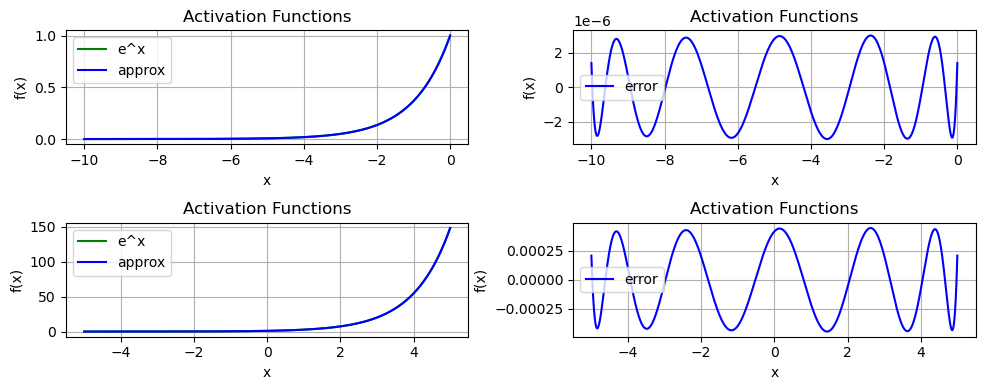

In [314]:
import matplotlib.pyplot  as plt
import math
import numpy as np
from numpy.polynomial import Chebyshev
from random import *

pi = math.pi
cos = math.cos
sin = math.sin 


def target_function(x):
    return pow(math.e, x)

def targ_1(x):
    return pow(math.e, (10)/2*(x-1))
    
def targ_2(x):
    return pow(math.e, (10)/2*(x))
    
cheby_deg = 12

# x = np.array([-1 + 2*i/32 for i in range(33)])
x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)

y1 = np.array([targ_1(xx) for xx in x])
chebyPoly = Chebyshev.fit(x, y1, deg = cheby_deg-1)
y1 = chebyPoly.coef
y1 = list(y1)
print(y1)

y2 = np.array([targ_2(xx) for xx in x])
chebyPoly = Chebyshev.fit(x, y2, deg = cheby_deg-1)
y2 = chebyPoly.coef
y2 = list(y2)
print(y2)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn1 = 0
for i in range(0, cheby_deg):
	pn1 = pn1 + y1[i] * T[i]
     
pn2 = 0
for i in range(0, cheby_deg):
	pn2 = pn2 + y2[i] * T[i]

# Generate x values
x = np.linspace(-10, 0, 10000)

# Create the figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 4))

# Plot activation functions
ax1.plot(x, target_function(x), label='e^x', color='green')
ax1.plot(x, pn1(x/5+1), label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, target_function(x) - pn1(x/5+1), label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()


x = np.linspace(-5, 5, 10000)
# Plot activation functions
ax3.plot(x, target_function(x), label='e^x', color='green')
ax3.plot(x, pn2(x/5), label='approx', color='blue')
ax3.set_title('Activation Functions')
ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')
ax3.grid(True)
ax3.legend()

# Plot activation functions
ax4.plot(x, target_function(x) - pn2(x/5), label='error', color='blue')
ax4.set_title('Activation Functions')
ax4.set_xlabel('x')
ax4.set_ylabel('f(x)')
ax4.grid(True)
ax4.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
# standard
def softmax1(x):
    e_x = np.exp(x - np.max(x))
    print("max_x: ",np.max(x))
    return e_x / e_x.sum(axis=0)

# optimized
def softmax2(x):
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

# x ** -(1/m)
m = 1
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m

def pow_m_inv(x, K):
    y = 1
    for ki in K:
        # ki*y*(2-x*ki*y)
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 8, sigma_i, 4)
print(K_inv)

# approx
def approx_e1(x):
    return pn1(x/5+1)
def approx_softmax1(x):
    max_x = np.max(x)
    max_x = 5
    e_x = approx_e1(x - max_x)
    temp = e_x.sum(axis=0)
    # print(temp)
    temp = pow_m_inv(temp/20, K_inv) / 20
    return e_x * temp

def approx_e2(x):
    return pn2(x/5)
def approx_softmax2(x):
    e_x = approx_e2(x)
    temp = e_x.sum(axis=0)
    # print(temp)
    temp = pow_m_inv(temp/3000, K_inv) / 3000
    return e_x * temp

data = np.random.uniform(-5, 5, [128])

print("error with optimized softmax", max(softmax1(data) - softmax2(data)))
print("sum of standard softmax", sum(softmax1(data)))

print("error with approx1 softmax", max(softmax1(data) - approx_softmax1(data)))
print("sum of approx1 softmax", sum(approx_softmax1(data)))

print("error with approx2 softmax", max(softmax1(data) - approx_softmax2(data)))
print("sum of approx2 softmax", sum(approx_softmax2(data)))


[1.708209458521407, 1.3347202619383138, 1.0593437148393925]
max_x:  4.9973901723311425
error with optimized softmax 6.938893903907228e-18
max_x:  4.9973901723311425
sum of standard softmax 0.9999999999999998
max_x:  4.9973901723311425
error with approx1 softmax 5.959231746141547e-05
sum of approx1 softmax 0.9990513457626595
max_x:  4.9973901723311425
error with approx2 softmax 4.228289667802809e-05
sum of approx2 softmax 0.9993271753252402


[ 1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  6.12323400e-17 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00]
[0.99330715 0.99263721 0.99023751 0.98459211 0.97168208 0.94146714
 0.87140256 0.72620478 0.5        0.27379522 0.12859744 0.05853286
 0.02831792 0.01540789 0.00976249 0.00736279 0.00669285]
[0.5, 0.5876811235265726, -2.007269726835591e-17, -0.12149623872303088, -2.0072697268355913e-17, 0.035317888765259355, -1.0917210757920756e-16, -0.010693712782924763, -1.8652562430325655e-16, 0.003260293428351401, -2.2019441004172328e-16, -0.0009931752451993756, -9.895698703494615e-18, 0.00029550137814745605, -1.761892554953261e-17, -6.453127146099342e-05]


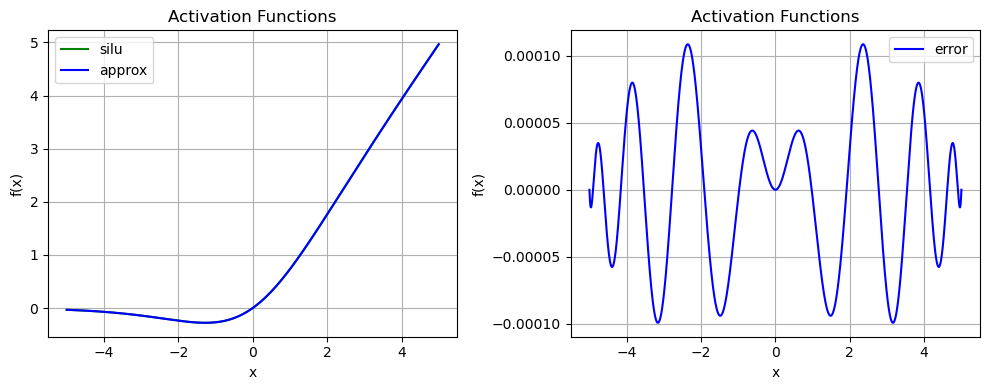

In [161]:

length = 5
cheby_deg = 16

def target_function(x):
    return pow(math.e, x)/(1 + pow(math.e, x))

def targ_2(x):
    x *= length
    return pow(math.e, x)/(1 + pow(math.e, x))

x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)
y = np.array([targ_2(xx) for xx in x])
print(y)

chebyPoly = Chebyshev.fit(x, y, deg = cheby_deg-1)
y = chebyPoly.coef
y = list(y)
print(y)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn = 0
for i in range(0, cheby_deg):
	pn = pn + y[i] * T[i]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x, beta=1):
    return x * sigmoid(beta * x)

def silu(x):
    return swish(x, beta=1)  # SiLU is Swish with beta=1


# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Generate x values
x = np.linspace(-length, length, 10000)
# Plot activation functions
ax1.plot(x, silu(x), label='silu', color='green')
ax1.plot(x, pn(x/length)*x, label='approx', color='blue')

# ax1.plot(x, pow_m_inv((1+pn(-x))/10, K_inv)/10*x, label='cheby', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()


# Plot activation functions
ax2.plot(x, silu(x) - pn(x/length)*x, label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

[ 1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  6.12323400e-17 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00]
[9.99999713e-01 9.99999530e-01 9.99998076e-01 9.99983902e-01
 9.99796524e-01 9.97264016e-01 9.72152665e-01 8.35331853e-01
 5.00000000e-01 1.64668147e-01 2.78473345e-02 2.73598382e-03
 2.03476009e-04 1.60981634e-05 1.92427820e-06 4.69698494e-07
 2.86651572e-07]
[0.5, 0.6234577610429392, 8.07567900971873e-17, -0.17602452170600366, 1.1776422425135919e-16, 0.0761747991351066, -1.2929493435476463e-16, -0.03371833834600424, -1.6116422569495642e-16, 0.014111526810286363, -2.0330980266310844e-16, -0.005444024438389357, -1.224401966956653e-16, 0.0018840923558029613, -4.5685761667957374e-17, -0.0004415815053097376]


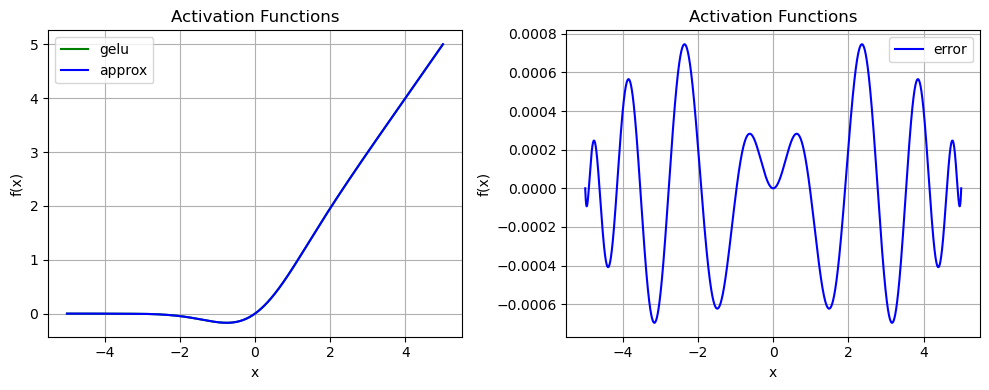

In [162]:
from scipy.stats import norm

length = 5

def gelu(x):
    return x * norm.cdf(x)

def targ_2(x):
    x *= length
    return norm.cdf(x)
    
cheby_deg = 16

x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)
y = np.array([targ_2(xx) for xx in x])
print(y)

chebyPoly = Chebyshev.fit(x, y, deg = cheby_deg-1)
y = chebyPoly.coef
y = list(y)
print(y)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn = 0
for i in range(0, cheby_deg):
	pn = pn + y[i] * T[i]
     
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Generate x values
x = np.linspace(-length, length, 10000)
# Plot activation functions
ax1.plot(x, gelu(x), label='gelu', color='green')
ax1.plot(x, pn(x/length)*x, label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, gelu(x) - pn(x/length)*x, label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()